<a href="https://colab.research.google.com/github/shubhamksingh1/WordTagging/blob/main/KTRAIN/V2/Word_Tagging_KtrainV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ENV SETUP

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [ ]:
os.environ['DISABLE_V2_BEHAVIOR'] = '1'

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.2MB 129kB/s 
     |████████████████████████████████| 6.7MB 60.2MB/s 
     |████████████████████████████████| 10.0MB 61.5MB/s 
     |████████████████████████████████| 983kB 48.5MB/s 
     |████████████████████████████████| 245kB 50.2MB/s 
     |████████████████████████████████| 1.8MB 47.0MB/s 
     |████████████████████████████████| 542kB 55.4MB/s 
     |████████████████████████████████| 870kB 58.1MB/s 
     |████████████████████████████████| 3.7MB 58.1MB/s 
     |████████████████████████████████| 1.0MB 59.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.11.3-cp36-none-any.whl size=25213801 sha256=6e1bae48df33a490de500f69c0442b8fc6b448c77c16693d9f29c3d878d3e703
  Stored in directory: /root/.cache/pip/wheels/c7/6f/71/4c5097ea14a1e7791668a96c585d7fc81c45f0eb2e7a94b681
  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=366eb526948c9ea18ba12d5a99f351571cb231b6752d3a44e602cf7c8aa871e1
  Stored in direc

In [ ]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc1)


In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0-rc1'

In [ ]:
import ktrain
from ktrain import text

Using DISABLE_V2_BEHAVIOR with TensorFlow


In [ ]:
!pip3 install allennlp

     |████████████████████████████████| 7.6MB 16.0MB/s 
     |████████████████████████████████| 5.5MB 22.6MB/s 
     |████████████████████████████████| 204kB 36.0MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 163kB 45.5MB/s 
     |████████████████████████████████| 133kB 36.7MB/s 
     |████████████████████████████████| 30.9MB 102kB/s 
     |████████████████████████████████| 256kB 48.6MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 245kB 48.7MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 2.1MB 53.2MB/s 
     |████████████████████████████████| 3.2MB 47.7MB/s 
     |████████████████████████████████| 92kB 14.7MB/s 
  Created wheel for parsimonious: filename=parsimonious-0.8.1-cp36-none-any.whl size=42712 sha256=ebf711a7cf645da76895f3529ac1f750de6b7f6c72cdcf65c1e144b06e6573ee
  Stored in directory: /root/.cache/pip/wheels/b7/8d/e7/a0e

###  Load and Preprocess Data

In [ ]:
DATAFILE = '/content/drive/My Drive/final_bios_dataset (2).csv'
WV_URL = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz'
(trn, val, preproc) = text.entities_from_txt(DATAFILE,
                                             wv_path_or_url=WV_URL,
                                             sentence_column='SentenceID',
                                             word_column='Words',
                                             tag_column='Tags', 
                                             data_format='gmb',
                                             use_elmo=True)

detected encoding: utf-8 (if wrong, set manually)
Number of sentences:  3586
Number of words in the dataset:  2685
Tags: ['S-ROLE', 'B-TECH', 'B-EXP', 'I-PER', 'B-ORG', 'I-ORG', 'I-ROLE', 'B-DES', 'S-CON', 'B-ROLE', 'S-ORG', 'B-PER', 'S-PER', 'I-DES', 'I-TECH', 'O', 'S-TECH', 'S-EMAIL', 'I-EXP']
Number of Labels:  19
Longest sentence: 107 words


100%|██████████| 374434792/374434792 [00:21<00:00, 17164823.68B/s]


### Define a Model

In [ ]:
text.print_sequence_taggers()

bilstm-crf: Bidirectional LSTM-CRF  (https://arxiv.org/abs/1603.01360)
bilstm: Bidirectional LSTM (no CRF layer)  (https://arxiv.org/abs/1603.01360)


In [ ]:
model = text.sequence_tagger('bilstm-crf', preproc) 

pretrained word embeddings will be loaded from:
	https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
downloading pretrained word vectors to /root/ktrain_data ...
[██████████████████████████████████████████████████]
extracting pretrained word vectors...
done.

cleanup downloaded zip...
done.

loading pretrained word vectors...this may take a few moments...


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=128)

### Train and Evaluate the Model

In [ ]:
learner.lr_find(max_epochs =10)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
25/25 [==============================] - 173s 7s/step - loss: 49.9374
Epoch 2/10
25/25 [==============================] - 184s 7s/step - loss: 52.8504
Epoch 3/10
25/25 [==============================] - 182s 7s/step - loss: 50.7090
Epoch 4/10
25/25 [==============================] - 177s 7s/step - loss: 48.8873
Epoch 5/10
25/25 [==============================] - 164s 7s/step - loss: 48.2870
Epoch 6/10
25/25 [==============================] - 172s 7s/step - loss: 49.3655
Epoch 7/10
25/25 [==============================] - 182s 7s/step - loss: 48.0137
Epoch 8/10
25/25 [==============================] - 184s 7s/step - loss: 49.7623
Epoch 9/10
25/25 [==============================] - 153s 6s/step - loss: 46.7970
Epoch 10/10
25/25 [==============================] - 195s 8s/step - loss: 67.5095


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the 

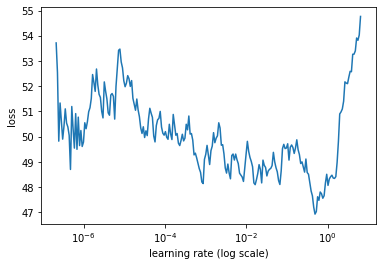

In [ ]:
learner.lr_plot()

### Train and Evaluate the Model

In [ ]:
learner.fit(1e-01, 100, cycle_len=1)

Epoch 1/100
26/26 [==============================] - 215s 8s/step - loss: 49.2585 - val_loss: 35.2672
Epoch 2/100
26/26 [==============================] - 208s 8s/step - loss: 49.3417 - val_loss: 35.6855
Epoch 3/100
26/26 [==============================] - 210s 8s/step - loss: 48.4802 - val_loss: 35.0837
Epoch 4/100
26/26 [==============================] - 212s 8s/step - loss: 48.0556 - val_loss: 34.9435
Epoch 5/100
26/26 [==============================] - 213s 8s/step - loss: 47.9306 - val_loss: 34.8891
Epoch 6/100
26/26 [==============================] - 214s 8s/step - loss: 47.9088 - val_loss: 34.8866
Epoch 7/100
26/26 [==============================] - 211s 8s/step - loss: 47.8707 - val_loss: 34.8604
Epoch 8/100
26/26 [==============================] - 215s 8s/step - loss: 47.8463 - val_loss: 34.8470
Epoch 9/100
26/26 [==============================] - 214s 8s/step - loss: 47.8580 - val_loss: 34.8438
Epoch 10/100
26/26 [==============================] - 214s 8s/step - loss: 47.8362

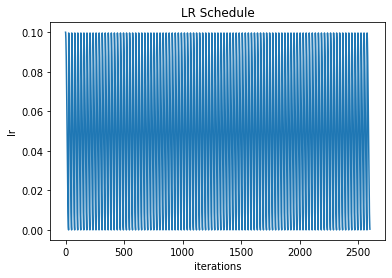

In [ ]:
learner.plot('lr')

In [ ]:
learner.validate(class_names=preproc.get_classes())

   F1: 90.04
           precision    recall  f1-score   support

     ROLE       1.00      0.90      0.95        10
     TECH       0.87      0.97      0.92       183
      DES       0.75      0.75      0.75         8
      PER       1.00      1.00      1.00         2
      ORG       0.81      0.87      0.84        15
      EXP       0.75      1.00      0.86         6
    EMAIL       1.00      1.00      1.00         2
      CON       0.50      0.50      0.50         4

micro avg       0.86      0.94      0.90       230
macro avg       0.86      0.94      0.90       230



0.9004149377593361

In [ ]:
learner.view_top_losses(n=1)

### Make Prediction

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.predict('Tilak has experience in Python and Java')

In [ ]:
predictor.predict("Google Cloud Platform")

### SAVE LOAD PREDICT

In [ ]:
predictor.save('/content/drive/My Drive/Seq_Tag_ktrain/Seq_Tag_ktrainv2/mypred')

In [ ]:
reloaded_predictor = ktrain.load_predictor('/content/drive/My Drive/Seq_Tag_ktrain/Seq_Tag_ktrainv2/mypred')

In [ ]:
reloaded_predictor.predict('Python')